# Based on Yu et al. 2024

In [1]:
import os

import torch

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy.typing as npt
from typing import Callable

current_device = torch.cuda.current_device()
print(torch.cuda.get_device_name(current_device))

NVIDIA GeForce GTX 960


In [2]:
from nn_helper import MyDataset, get_dataset

train_dataset = MyDataset("data/dataset_train_2.csv")
test_dataset = MyDataset("data/dataset_test_2.csv")

In [3]:
from nn_models import NNYuEtAl

num_sensors = 6
input_size = num_sensors * 2

#model = MyNN(input_size)
model = NNYuEtAl(input_size)

batch_size = 8

#train_dl, val_dl = get_dataset(train_dataset, 0.2, batch_size)
#x, y = next(iter(train_dl))
#x: torch.Tensor
#print(x.shape) #batch, input_params == 8, 12

#x, y = 
#x = x.to(dtype=torch.float32)
#x = x.unsqueeze(0)
#x = x.reshape(batch_size, 1, input_size)
#x = x.transpose(1, 2)

#print(x.shape)
#y_p = model(x)
#print(y_p.shape)

model.info(batch_size)

Layer (type:depth-idx)                   Output Shape              Param #
NNYuEtAl                                 [8, 2]                    --
├─Conv1d: 1-1                            [8, 20, 10]               80
├─BatchNorm1d: 1-2                       [8, 20, 10]               40
├─MaxPool1d: 1-3                         [8, 20, 5]                --
├─Conv1d: 1-4                            [8, 10, 3]                610
├─BatchNorm1d: 1-5                       [8, 10, 3]                20
├─MaxPool1d: 1-6                         [8, 10, 1]                --
├─Flatten: 1-7                           [8, 10]                   --
├─LSTM: 1-8                              [8, 20]                   2,560
├─LSTM: 1-9                              [8, 20]                   3,360
├─Linear: 1-10                           [8, 2]                    42
Total params: 6,712
Trainable params: 6,712
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.97
Input size (MB): 0.00
Forward/backward p

Loss at epoch 000: train_loss = 1142.212745 / val_loss = 1190.080348
Loss at epoch 010: train_loss = 62.671882 / val_loss = 17.770592
Loss at epoch 020: train_loss = 43.594332 / val_loss = 18.673734
Loss at epoch 030: train_loss = 35.551840 / val_loss = 15.518471
Loss at epoch 040: train_loss = 31.996749 / val_loss = 13.710409
Loss at epoch 050: train_loss = 30.422725 / val_loss = 25.077421
Loss at epoch 060: train_loss = 30.580417 / val_loss = 0.337003
Loss at epoch 070: train_loss = 26.637186 / val_loss = 33.967043
Loss at epoch 080: train_loss = 26.890977 / val_loss = 15.041271
Loss at epoch 090: train_loss = 28.904669 / val_loss = 10.311415
Loss at epoch 100: train_loss = 29.910289 / val_loss = 9.028309
Loss at epoch 110: train_loss = 30.144691 / val_loss = 1.419797
Loss at epoch 120: train_loss = 30.509153 / val_loss = 0.572606
Loss at epoch 130: train_loss = 28.445790 / val_loss = 11.082660
Loss at epoch 140: train_loss = 29.321546 / val_loss = 5.364373
Loss at epoch 150: train_l

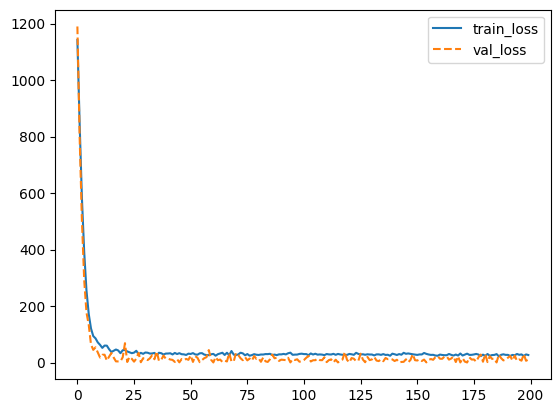

In [4]:
from nn_train import train_model

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=2e-2)
history = train_model(model, train_dataset, loss_fn, optimizer, current_device, epochs=200, validation_split=0.2, batch_size=batch_size, lambda1=0.02, lambda2=0.01)

# Plot history
plt.figure()

epochs = range(len(history["train_loss"]))
plt_list = [["train_loss", "-"], ["val_loss", "--"]]

for name, style in plt_list:
    plt.plot(epochs, history[name], style, label=name)
plt.legend(loc="best")

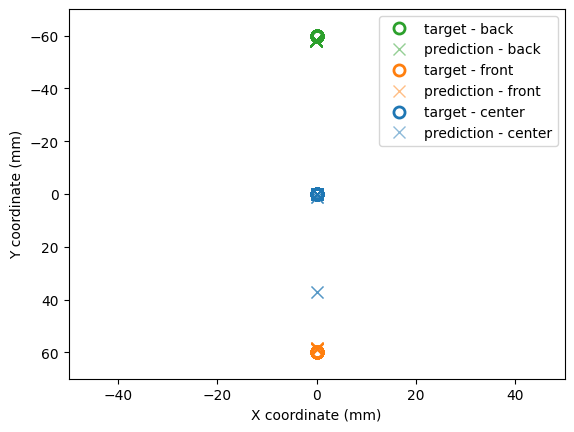

In [5]:
from nn_helper import locations
from nn_train import test_model

#model = best_trained_model
def error_fun(prediction: npt.ArrayLike, target: npt.ArrayLike) -> float:
    return np.linalg.norm(target - prediction)

fig, ax, errors = test_model(model, test_dataset, locations, error_fun=error_fun)

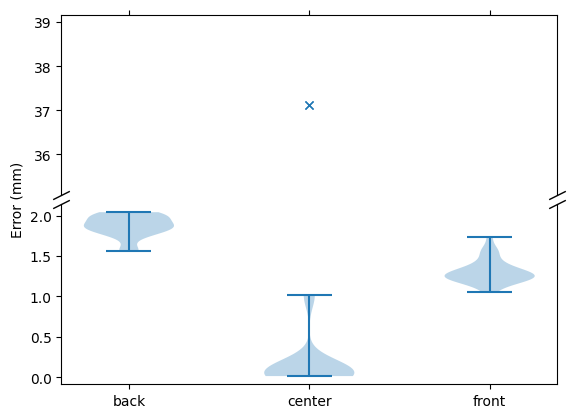

In [6]:
from nn_train import plot_violins_from_error

fig, ax = plot_violins_from_error(errors, threshold=30)